## Importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

sns.set_style('darkgrid')

In [3]:
!git clone "https://github.com/Yashtiii/Netflix-Content-Strategy"

Cloning into 'Netflix-Content-Strategy'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 13 (delta 4), reused 8 (delta 2), pack-reused 0 (from 0)
Receiving objects: 100% (13/13), 1.17 MiB | 4.31 MiB/s, done.
Resolving deltas: 100% (4/4), done.


## Data loading and initial inspection

In [4]:
netflix_df = pd.read_csv("/content/Netflix-Content-Strategy/netflix_titles.csv")

In [5]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [6]:
netflix_df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


### Getting an idea of how many values we are missing
As we can see we have the highest number of values missing from director column and least number of data missing from rating column

In [7]:
netflix_df.isna().sum()

,0
show_id,0
type,0
title,0
director,2389
cast,718
country,507
date_added,10
release_year,0
rating,7
duration,0


### Checking out the data types
- Now that I know how many columns have missing values, I am going through their datatypes to understand my next step on how to handle them. Currently I am missing data in Director, cast, country, date_added, rating. All of these have object data type which means currently I can't use mean or median to fill the values.
- I can also see that I have 7787 number of rows and 12 columns


In [11]:
netflix_df.shape

(7787, 12)

In [8]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


- **Correction -** *date_added* column is a type object (a string) not a datetime object. This has to be corrected.

In [9]:
netflix_df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


From describe() I learned that the timeline of my data starts from year 1925 and ends in 2021.

## Data cleaning and transformation

For null values we are going to do two things:
1) Dropping the rows if the percentage of data is small.
2) Replace missing values with "unknown" or mode.

In [12]:
netflix_df.isna().sum()

,0
show_id,0
type,0
title,0
director,2389
cast,718
country,507
date_added,10
release_year,0
rating,7
duration,0


#### Dealing with director and cast column

In [13]:
netflix_df["director"]

,director
0,NaN
1,Jorge Michel Grau
2,Gilbert Chan
3,Shane Acker
4,Robert Luketic
...,...
7782,Josef Fares
7783,Mozez Singh
7784,NaN
7785,NaN


In [22]:
netflix_df["director"].value_counts()

,count
director,
Unknown,2389
"Raúl Campos, Jan Suter",18
Marcus Raboy,16
Jay Karas,14
Cathy Garcia-Molina,13
...,...
Jonathan Helpert,1
Greg Kohs,1
Jacob Schwab,1


- We can't fill the director missing values with median because many movies/series have a different director.( there are a lot of categories )
- So we will fill that with unknown.


In [14]:
netflix_df["director"] = netflix_df["director"].fillna("Unknown")

In [17]:
netflix_df["director"].isna().sum()

np.int64(0)

Doing the same for cast.

In [23]:
netflix_df["cast"].value_counts()

,count
cast,
Unknown,718
David Attenborough,18
Samuel West,10
Jeff Dunham,7
"Michela Luci, Jamie Watson, Eric Peterson, Anna Claire Bartlam, Nicolas Aqui, Cory Doran, Julie Lemieux, Derek McGrath",6
...,...
"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed El Fishawy, Mahmoud Hijazi, Jihane Khalil, Asmaa Galal, Tara Emad",1
"Samuel L. Jackson, John Heard, Kelly Rowan, Clifton Collins Jr., Tony Plana",1
"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anupam Shyam, Raayo S. Bakhirta, Yashvit Sancheti, Greeva Kansara, Archan Trivedi, Rajiv Pathak",1


In [18]:
netflix_df["cast"] = netflix_df["cast"].fillna("Unknown")

In [19]:
netflix_df["cast"].isna().sum()

np.int64(0)

#### Let's work on countries now!




In [20]:
netflix_df["country"].head()

,country
0,Brazil
1,Mexico
2,Singapore
3,United States
4,United States


In [21]:
netflix_df["country"].value_counts()

,count
country,
United States,2555
India,923
United Kingdom,397
Japan,226
South Korea,183
...,...
"Germany, United States, United Kingdom, Canada",1
"Peru, United States, United Kingdom",1
"Saudi Arabia, United Arab Emirates",1


There are 681 different categories with United States having the highest number. 503 rows have missing values in countries and we can fill them with the mode (United States). We didn't do that with cast and director because movies because it had more than 4000 categories! and cast had more than 6000 categories.

In [33]:
mode_country = netflix_df["country"].mode()[0]
# mode() returns a series so using mode()[0] ensures that we are assigning it's first value
mode_country
netflix_df["country"] = netflix_df["country"].fillna(mode_country)

In [32]:
netflix_df.isna().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,10
release_year,0
rating,7
duration,0


In [36]:
netflix_df[["date_added", "rating"]].head()
# we are only missing 7 values in rating and 10 values in date_added so dropping them wouldn't be a bad option considering that we have more than 7000 rows.

,date_added,rating
0,"August 14, 2020",TV-MA
1,"December 23, 2016",TV-MA
2,"December 20, 2018",R
3,"November 16, 2017",PG-13
4,"January 1, 2020",PG-13


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('date_added').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('rating').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['date_added']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'date_added'}, axis=1)
              .sort_values('date_added', ascending=True))
  xs = counted['date_added']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_2.sort_values('date_added', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('date_added')):
  _plot_series(series, series_name, i)
  fig.legend(title='date_added', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date_added')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['date_added']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'date_added'}, axis=1)
              .sort_values('date_added', ascending=True))
  xs = counted['date_added']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('date_added', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('rating')):
  _plot_series(series, series_name, i)
  fig.legend(title='rating', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date_added')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['rating'].value_counts()
    for x_label, grp in _df_4.groupby('date_added')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('date_added')
_ = plt.ylabel('rating')

In [39]:
netflix_df.dropna(subset=["date_added","rating"], inplace= True)
# inplace ensures that whatever changes we have made right now it will reflect to the originat dataset. By default the value of inplace is false.

In [40]:
netflix_df.isna().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


In [42]:
netflix_df.shape

(7770, 12)

Initially I had 7787 rows, here I lost 17 rows but it is a very small percentage in comparison to 7787 rows

Now  let's work on changing the data type of date added so we can actually use it for our analysis.

- **.to_datetime** is essential for handeling date operations in pandas. It converts strings, numbers or any other kind of representations of date into pandas datetime type.
- using **format="mixed"** means pandas will infer all different representations and convert them into one.
- **dayfirst=False:** Tells Pandas that dates are in "month-day-year" or "year-month-day" style, not "day-month-year". For example, "03/05/2021" will be treated as March 5th, not May 3rd. We used this because we are given months first in the original dataset.

In [68]:
netflix_df["date_added"] = pd.to_datetime(netflix_df['date_added'], format = "mixed", dayfirst= False)

In [59]:
netflix_df["date_added"].head()
# year-month-day format

,date_added
0,2020-08-14
1,2016-12-23
2,2018-12-20
3,2017-11-16
4,2020-01-01


We are going to extract year and month from date_added column to understand the time period where movies are added the most. The day in these dates isn't that important.

In [60]:
netflix_df["year_added"] = netflix_df["date_added"].dt.year
netflix_df["year_added"].head()

,year_added
0,2020
1,2016
2,2018
3,2017
4,2020


In [61]:
netflix_df["month_added"] = netflix_df["date_added"].dt.month
netflix_df["month_added"].head()

,month_added
0,8
1,12
2,12
3,11
4,1


In [62]:
netflix_df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12


In [67]:
print(netflix_df.dtypes)
print(netflix_df.isna().sum())

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
year_added               int32
month_added              int32
dtype: object
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
year_added      0
month_added     0
dtype: int64


## Exploratory Data Analysis and Visualization

### Question 1: What is the distribution of content type?

type
Movie      5372
TV Show    2398
Name: count, dtype: int64


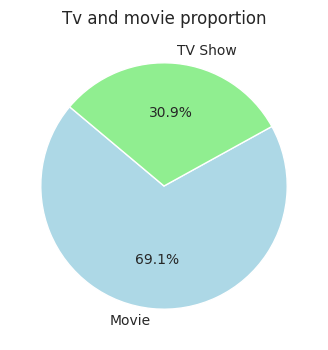

In [76]:
plt.figure(figsize=(6,4)) # standard size for a pie chart is 8,6
type_counts = netflix_df['type'].value_counts()
print(type_counts)
plt.pie(type_counts, labels= type_counts.index, autopct = '%1.1f%%', startangle=140, colors=["lightblue","lightgreen"])
plt.title("Tv and movie proportion")
plt.show()

**Insights** : Netflix has roughly 70% of movie content distributed on it's platform.
- so maybe people don't like a lot of long form of content because series consume a lot of time.
- also, many times netflix has discontinued a series if it doesn't get views so that's another reason we can say we have around 31% of series

Things to keep in mind while answering questions like mentioned above:
1) provide a numerical answers
2) show it using charts or graphs

### Question 2: How has content been added over time?

- we can show how the movies and series were added over time, at which time series had a higher priority than the movies

In [77]:
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'year_added', 'month_added'],
      dtype='object')

- **groupby**: it is grouping all unique pairs present in year_added and type column when they are together. It means that if it's the year 2008 and 2008 is a unique value it is going to be paired with unique values of type column. Type column has two unique values i.e. movie and tv show. So 2008 is going to be once paired with movie and once paired with Tv show.
- **size()**: counts the number of rows for each combination
- **unstack()**: the grouped data is reshaped in the form of tables
with year_added as the index for rows and movie and tv show as the columns
- **fillna()**: after unstacking we will have table and there must be combinations which don't have any value since size() didn't find any rows for them, they will be filled with Nan and that Nan will be replaced by 0

<Figure size 1400x800 with 0 Axes>

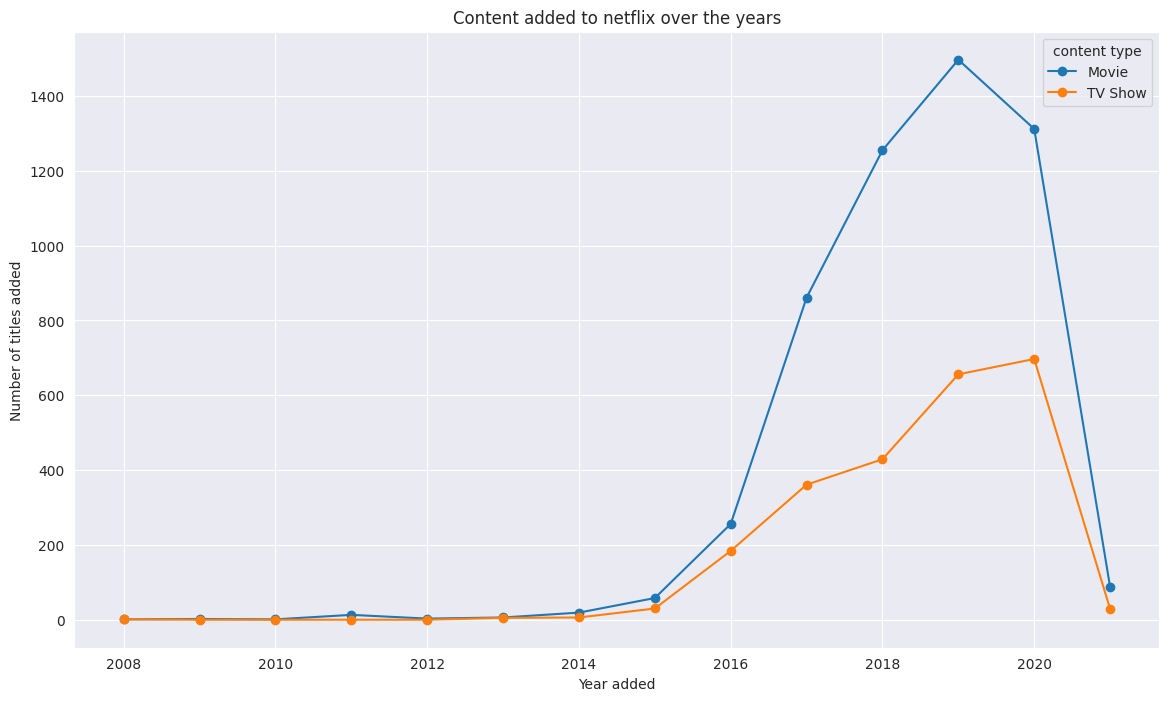

In [92]:
content_added_over_time = netflix_df.groupby(["year_added","type"]).size().unstack().fillna(0)
content_added_over_time

plt.figure(figsize=(14,8))
content_added_over_time.plot(kind="line", marker = "o", figsize = (14,8))
plt.title("Content added to netflix over the years")
plt.ylabel("Number of titles added")
plt.xlabel("Year added")
plt.legend(title="content type")
plt.grid(True)
plt.show()


**Insights:** Movies and series in netflix both hiked up between 2018 and 2020. Maybe one of the reasons was because of covid people started watching a lot of movies because no one was going out. So netflix so this as an opportunity to grow and added more movies and series to it's platform. At the same time the addition was went down as well because there wasn't a lot of collection since people weren't going to their jobs during covid.

### Question 3: what is the most popular genre?
- listed_in column holds the genre for our this question. It was packed with many categories including genre so we have to transform listed_in.
- We can split the string into a list of genres
- Other option would be to explode the dataframe. It means that each gennre will get its on row. Which can help us to perform value_counts() operation on it

In [95]:
netflix_df["listed_in"]
netflix_df["listed_in"].value_counts() #currently using value counts looks like this

,count
listed_in,
Documentaries,334
Stand-Up Comedy,321
"Dramas, International Movies",320
"Comedies, Dramas, International Movies",243
"Dramas, Independent Movies, International Movies",215
...,...
Sports Movies,1
"Crime TV Shows, TV Horror, TV Mysteries",1
"Children & Family Movies, Classic Movies, Dramas",1


- **netflix_df['listed_in'].str.split(", ")** splits the strings in the 'listed_in' column wherever there's a comma followed by a space—turning each cell's string into a list of genres. For example, if one entry is "Drama, Comedy, Thriller", it becomes the list ["Drama", "Comedy", "Thriller"].
- **assign(genre = ..**): it is assigning a new column in netflix_df
- **explode('genre')**: ek takes the list formed in genre and transforms each element in that list into it's own row. The index used will be same but there will be multiple rows with the same index.

In [109]:
genres = netflix_df.assign(genre = netflix_df['listed_in'].str.split(", ")).explode('genre')
genres.head(5)
# here genres is a dataframe
# it is not a good practice to use explode for the main dataset, that is why is are making a copy by assigning it to genres

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,genre
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,International TV Shows
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,TV Dramas
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,TV Sci-Fi & Fantasy
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,Dramas
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,International Movies


- When you do value_counts(), the unique values become the index of the resulting Series, and their counts become the values. This means the genres (category names) are now the index, not a normal column.
- **.reset_index():** Converts that Series into a DataFrame, turning the genre names from the index into a regular column (usually named 'index' by default), and the counts into another column.

In [112]:
top_genres = genres['genre'].value_counts().reset_index()
top_genres.columns = ['genre', 'count']
top_genres

,genre,count
0,International Movies,2437
1,Dramas,2105
2,Comedies,1471
3,International TV Shows,1197
4,Documentaries,786
5,Action & Adventure,721
6,TV Dramas,703
7,Independent Movies,673
8,Children & Family Movies,532
9,Romantic Movies,531


In [105]:
netflix_df.head(1) # this doesn't have the genre column because we assigned it to genres

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8


In [114]:
top_15_genre = top_genres.head(15)
top_15_genre

,genre,count
0,International Movies,2437
1,Dramas,2105
2,Comedies,1471
3,International TV Shows,1197
4,Documentaries,786
5,Action & Adventure,721
6,TV Dramas,703
7,Independent Movies,673
8,Children & Family Movies,532
9,Romantic Movies,531


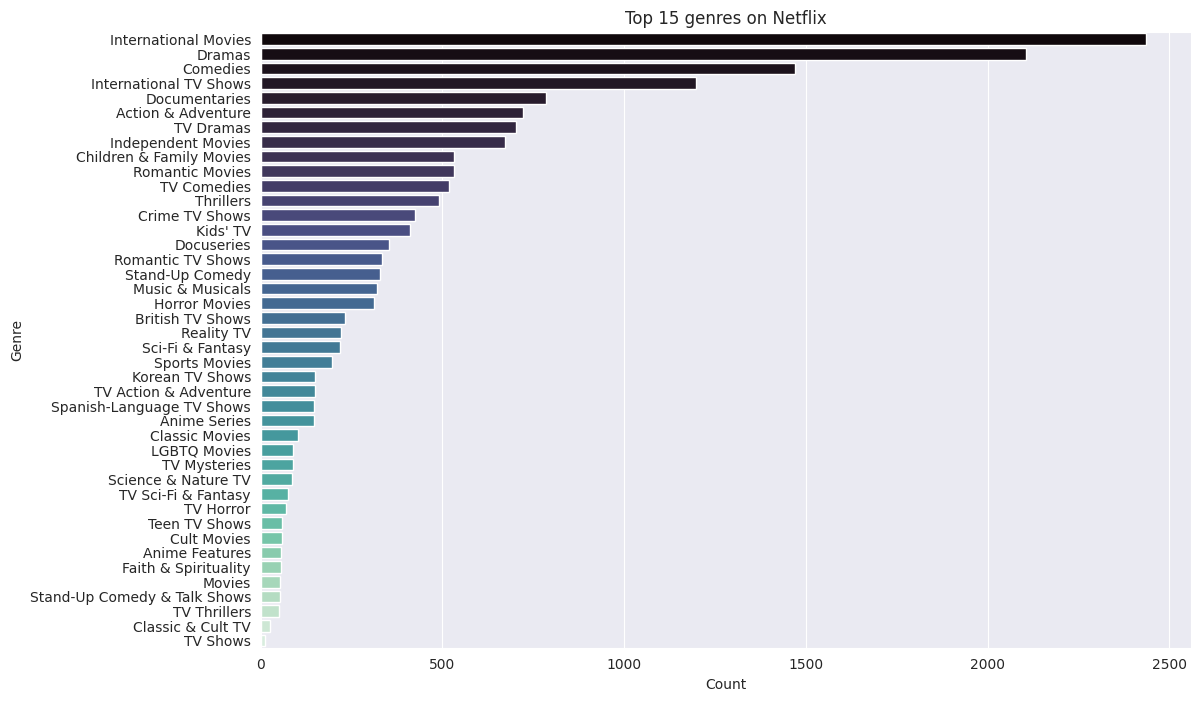

In [118]:
plt.figure(figsize=(12,8))
sns.barplot(x='count', y = 'genre', data= top_genres, palette="mako", hue="genre", legend = False)
plt.title("Top genres on Netflix")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()

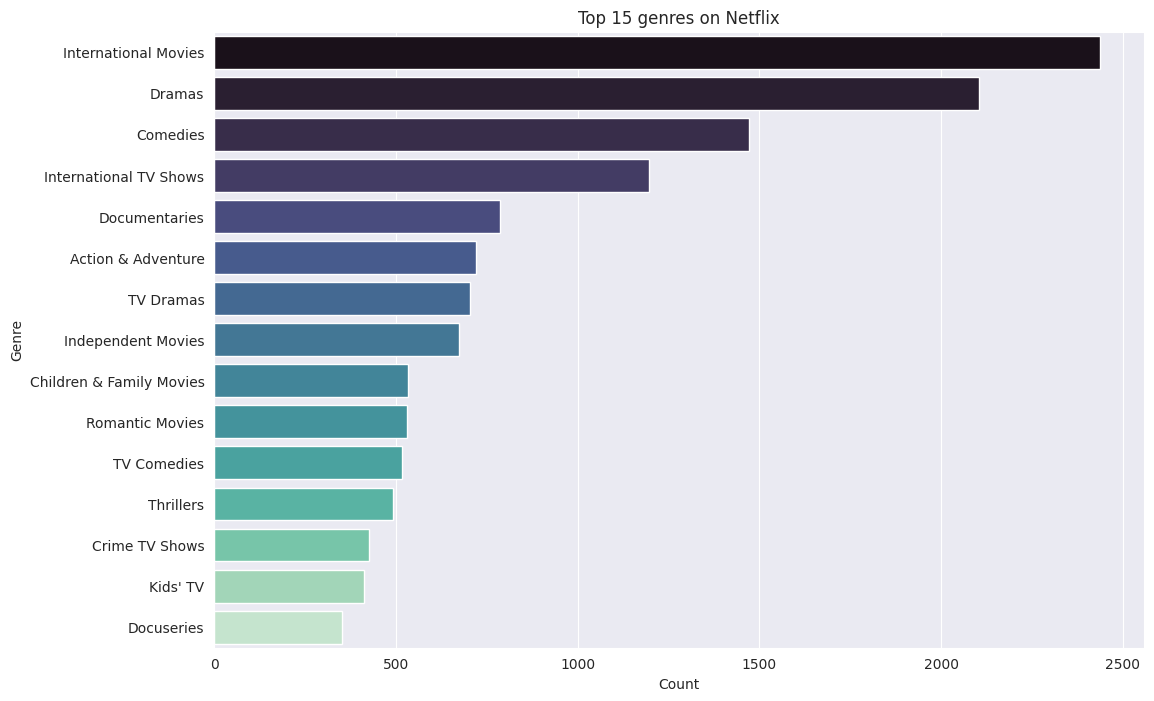

In [119]:
plt.figure(figsize=(12,8))
sns.barplot(x='count', y = 'genre', data= top_15_genre, palette="mako", hue="genre", legend = False)
plt.title("Top 15 genres on Netflix")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()

**Insights**: in terms of genre we can say that dramas and comedy are the most popular ones. I didn't say international because it's the origin of the movie, not the genre.

### Question 4: What is the distribution of content duration?

- basically how long is the content, for this we will refer to the duration column. The duration column is distributed into seasons and minutes, so maybe we can convert the seasons into minutes. But it's stll a object type we what we need is numerical values.
- Since there are two types of content movies and series so I am going to bifurcate duration into two types

In [120]:
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'year_added', 'month_added'],
      dtype='object')

In [121]:
netflix_df["duration"].value_counts()

,count
duration,
1 Season,1606
2 Seasons,378
3 Seasons,183
90 min,136
93 min,131
...,...
36 min,1
201 min,1
253 min,1


In [143]:
# copy() function is used to create a independent copy from the netflix dataframe. When we don't use the copy function and modify our variables then it might cause errors or changes in our original dataframe
movies_df = netflix_df[netflix_df["type"] == "Movie"].copy()
series_df = netflix_df[netflix_df["type"] == "TV Show"].copy()
movies_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'year_added', 'month_added'],
      dtype='object')

In [144]:
# Clean and convert duration for movies
movies_df['duration_min'] = movies_df['duration'].str.replace(' min', '').astype(int)

# Clean and convert duration for TV shows
series_df['seasons'] = series_df['duration'].str.replace(' Seasons', '').str.replace(' Season', '').astype(int)

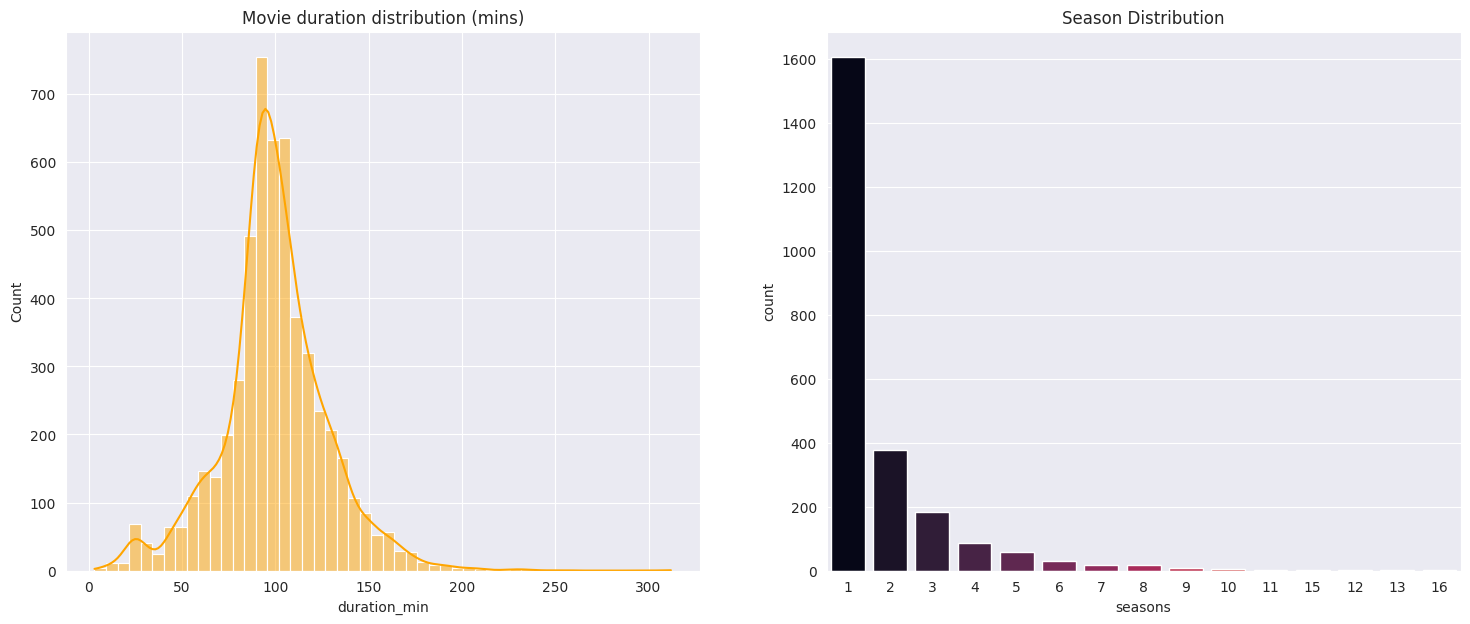

In [152]:
fig, axes = plt.subplots(1,2,figsize=(18,7))

sns.histplot(ax =axes[0], x='duration_min', data=movies_df, bins=50, kde= True, color='orange').set_title("Movie duration distribution (mins)")

# palette is a rocket color palette
# order=series_df['seasons'].value_counts().index: Orders the x-axis categories by the frequency of each season value from highest to lowest. This makes the bars sorted by count.
# hue='seasons': Colors the bars based on the "seasons" value, adding a legend and stacking colors by category (although here hue=seasons and x=seasons means each bar is one color).
sns.countplot(ax=axes[1], x='seasons', data=series_df, palette = 'rocket', order=series_df['seasons'].value_counts().index, hue='seasons', legend=False).set_title("Season Distribution")

plt.show()

### Question 5: Where does the content come from?

In [155]:
netflix_df["country"].value_counts()

,count
country,
United States,3051
India,923
United Kingdom,396
Japan,224
South Korea,183
...,...
"Germany, United States, United Kingdom, Canada",1
"Peru, United States, United Kingdom",1
"Saudi Arabia, United Arab Emirates",1


In [162]:
countries = netflix_df.assign(country = netflix_df['country'].str.split(", ")).explode('country')
countries.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1


In [159]:
countries["country"].value_counts()


,count
country,
United States,3792
India,990
United Kingdom,721
Canada,412
France,349
...,...
Panama,1
"United Kingdom,",1
Uganda,1


In [168]:
all_countries = countries['country'].value_counts().reset_index()
all_countries.columns = ['country', 'count']
all_countries

,country,count
0,United States,3792
1,India,990
2,United Kingdom,721
3,Canada,412
4,France,349
...,...,...
116,Panama,1
117,"United Kingdom,",1
118,Uganda,1
119,East Germany,1


In [169]:
top_15_countries = all_countries.head(15)

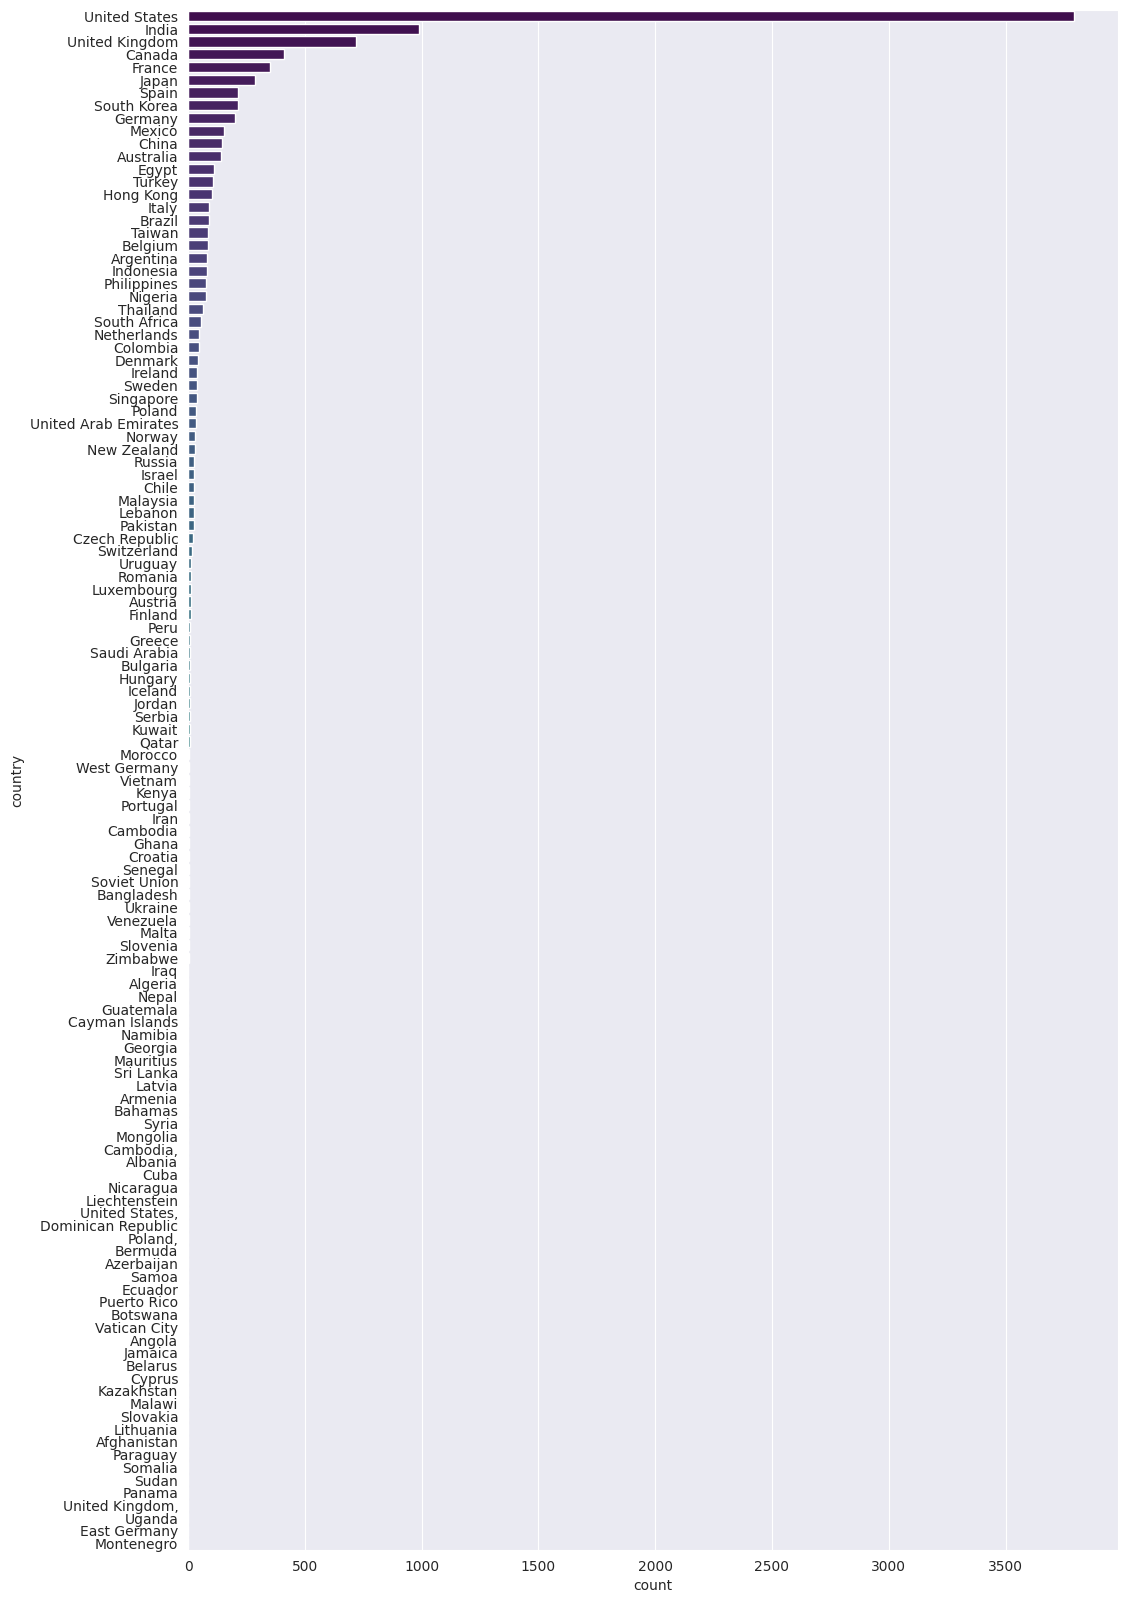

In [170]:
plt.figure(figsize=(12,20))
sns.barplot(y='country', x='count', data= all_countries, palette = "viridis", hue='country', legend = False)
plt.show()

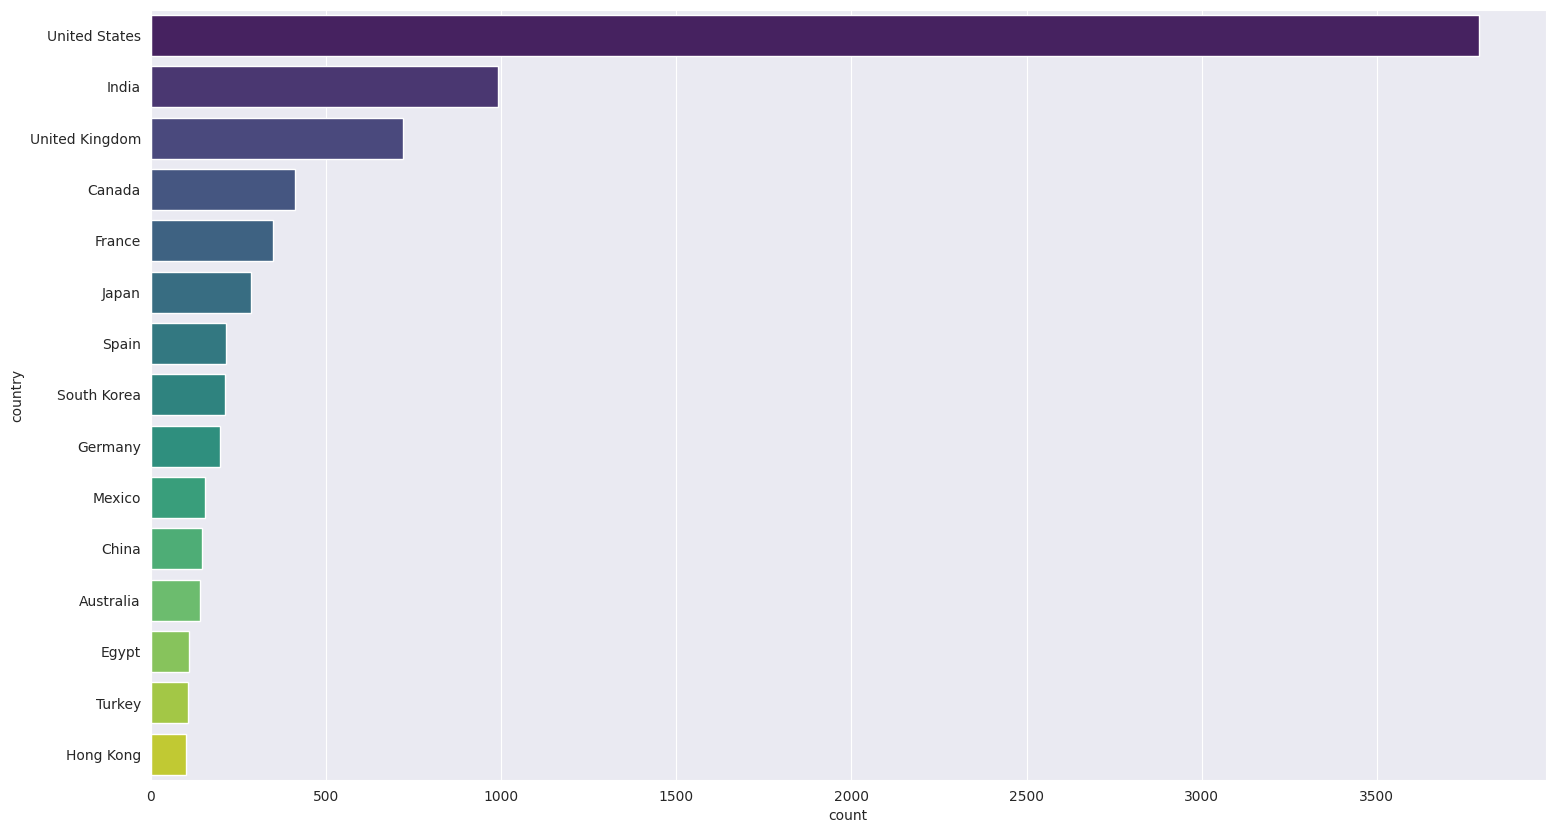

In [172]:
plt.figure(figsize=(18,10))
sns.barplot(y='country', x='count', data= top_15_countries, palette = "viridis", hue='country', legend = False)
plt.show()

## Question 6: What is the maturity rating of the content?